In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [2]:
sonar=pd.read_csv("sonar_data.csv",header=None)
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
sonar.shape

(208, 61)

In [4]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
sonar.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
sonar[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

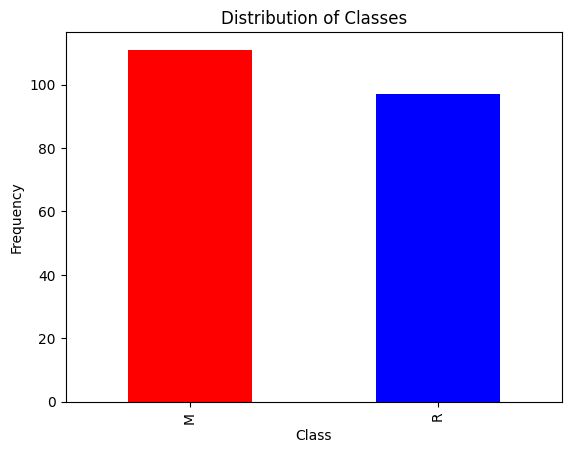

In [7]:
sonar[60].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Frequency") 
plt.show()

In [8]:
sonar.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [9]:
sonar[0].min()

np.float64(0.0015)

In [10]:
row={}
for i in range(60):
    Q1 = sonar[i].quantile(0.25)
    Q3 = sonar[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df=sonar[(sonar[i]< lower_bound) | (sonar[i]> upper_bound)]
    for j in df.index:
        if j not in row:
            row[j] = 1
        else:
            row[j] += 1
print(row)


{4: 1, 87: 4, 98: 7, 126: 1, 129: 6, 131: 8, 132: 7, 133: 10, 134: 9, 136: 11, 138: 11, 141: 7, 145: 5, 146: 17, 148: 3, 6: 3, 85: 3, 100: 3, 102: 5, 140: 11, 111: 3, 142: 10, 19: 8, 20: 3, 97: 3, 130: 4, 147: 12, 1: 5, 90: 1, 91: 3, 143: 7, 127: 6, 2: 7, 135: 9, 171: 4, 137: 2, 184: 2, 5: 3, 101: 4, 3: 3, 17: 2, 21: 2, 22: 12, 44: 11, 164: 3, 16: 4, 47: 1, 181: 3, 156: 2, 157: 4, 158: 2, 159: 2, 161: 6, 183: 2, 186: 7, 144: 4, 180: 1, 182: 1, 185: 1, 166: 3, 86: 1, 33: 1, 149: 1, 35: 1, 104: 2, 99: 3, 105: 2, 34: 1, 36: 1, 112: 2, 122: 1, 65: 1, 88: 2, 115: 2}


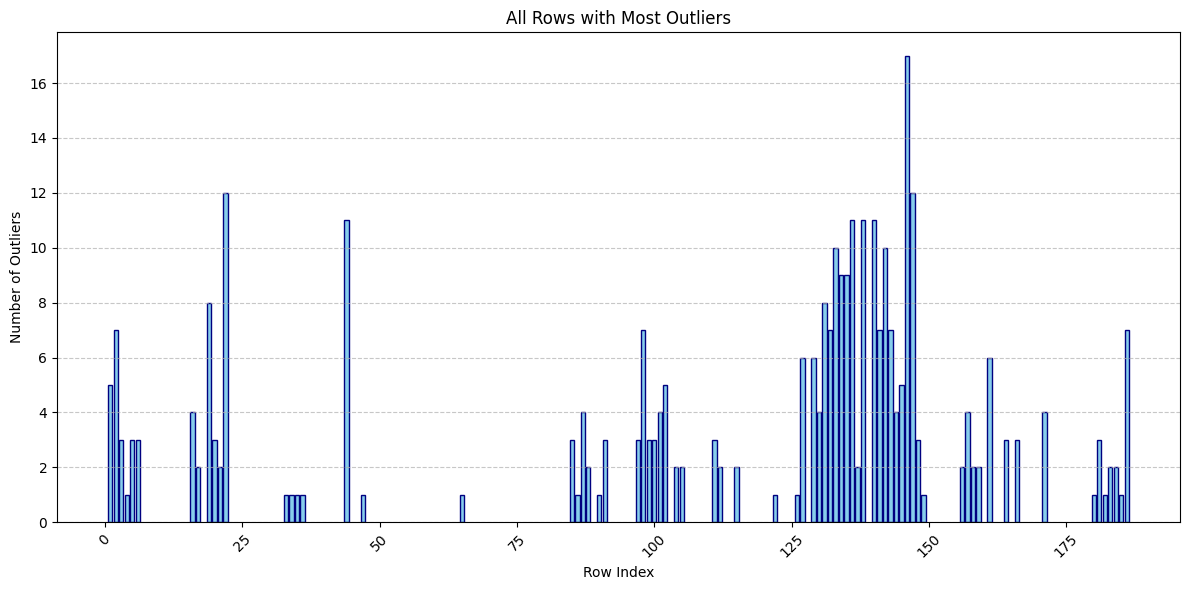

Total rows with outliers: 74
Maximum outliers in a single row: 17 (Row 146)


In [11]:

sorted_rows = {k: v for k, v in sorted(row.items(), key=lambda item: item[1], reverse=True)}

top_rows = {k: v for i, (k, v) in enumerate(sorted_rows.items()) }

plt.figure(figsize=(12, 6))
plt.bar(top_rows.keys(), top_rows.values(), color='skyblue', edgecolor='navy')
plt.title('All Rows with Most Outliers')
plt.xlabel('Row Index')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Total rows with outliers: {len(row)}")
print(f"Maximum outliers in a single row: {max(row.values())} (Row {max(row, key=row.get)})")

In [12]:
ls=[]
for i in row:
    ls.append(row[i])
mean=sum(ls)/len(ls)
print(f"Mean number of outliers per row: {mean}")
sd=np.std(ls)
print(f"Standard deviation of outliers per row: {sd}")


Mean number of outliers per row: 4.391891891891892
Standard deviation of outliers per row: 3.498329978284108


In [13]:
threshold = mean + 2* sd
threshold

np.float64(11.388551848460107)

In [14]:
test_df=sonar.copy()
test_df.drop(index=[i for i in row if row[i] > threshold],inplace=True)
test_df[60].value_counts()


60
M    109
R     96
Name: count, dtype: int64

In [15]:
sonar=test_df.copy()

In [16]:
X= sonar.drop(60, axis=1)
y= sonar[60]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)

In [18]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
X_train_pred=model.predict(X_train)
train_accuracy = accuracy_score(y_train, X_train_pred)
print(f"Training Accuracy: {train_accuracy:f}")
X_test_pred=model.predict(X_test)
test_accuracy = accuracy_score(y_test, X_test_pred)
print(f"Test Accuracy: {test_accuracy:f}")

Training Accuracy: 0.826087
Test Accuracy: 0.809524


In [20]:
input=(0.0192,0.0607,0.0378,0.0774,0.1388,0.0809,0.0568,0.0219,0.1037,0.1186,0.1237,0.1601,0.3520,0.4479,0.3769,0.5761,0.6426,0.6790,0.7157,0.5466,0.5399,0.6362,0.7849,0.7756,0.5780,0.4862,0.4181,0.2457,0.0716,0.0613,0.1816,0.4493,0.5976,0.3785,0.2495,0.5771,0.8852,0.8409,0.3570,0.3133,0.6096,0.6378,0.2709,0.1419,0.1260,0.1288,0.0790,0.0829,0.0520,0.0216,0.0360,0.0331,0.0131,0.0120,0.0108,0.0024,0.0045,0.0037,0.0112,0.0075)
input=np.array(input).reshape(1, -1)
input_pred=model.predict(input)
print(f"Predicted class for the input: {input_pred}")


Predicted class for the input: ['R']


In [21]:
input=(0.0443,0.0446,0.0235,0.1008,0.2252,0.2611,0.2061,0.1668,0.1801,0.3083,0.3794,0.5364,0.6173,0.7842,0.8392,0.9016,1.0000,0.8911,0.8753,0.7886,0.7156,0.7581,0.6372,0.3210,0.2076,0.2279,0.3309,0.2847,0.1949,0.1671,0.1025,0.1362,0.2212,0.1124,0.1677,0.1039,0.2562,0.2624,0.2236,0.1180,0.1103,0.2831,0.2385,0.0255,0.1967,0.1483,0.0434,0.0627,0.0513,0.0473,0.0248,0.0274,0.0205,0.0141,0.0185,0.0055,0.0045,0.0115,0.0152,0.0100)
input=np.array(input).reshape(1, -1)
input_pred=model.predict(input)
print(f"Predicted class for the input: {input_pred}")

Predicted class for the input: ['M']
